### Feature Selection

#### Обучение без отбора признаков

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
x_data_generated, y_data_generated = make_classification(scale=1, random_state=2)

In [3]:
df = pd.DataFrame(x_data_generated)
df['y'] = y_data_generated
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y
0,-0.266237,1.578341,0.247676,0.687824,-1.847434,0.953177,-0.345242,-0.665180,0.793525,-0.034685,...,1.332393,0.457189,0.696194,0.149828,0.391683,0.080271,-0.170702,0.765867,-2.168618,1
1,0.095557,-1.275961,1.802963,-1.088162,-1.595212,1.288769,0.134925,-2.002079,-0.500791,-1.107439,...,1.522093,-0.982756,-0.176286,-0.829875,-0.757856,-1.778601,2.086683,1.147100,-0.344624,0
2,-0.351827,0.274941,-0.745715,0.087547,0.894523,0.466792,-0.986960,0.474161,-0.733520,-0.437133,...,-0.791480,1.286021,0.017672,-0.722067,-0.504842,1.049926,1.647945,-0.294323,1.091709,1
3,-0.307988,-0.523734,1.299232,-1.014463,-1.516978,-0.065410,0.766116,0.287208,-0.952897,0.780754,...,1.350327,-0.543883,-1.055840,0.021202,-1.115264,-0.061635,0.184302,-1.529391,-0.330676,0
4,1.335312,0.893236,0.039855,-0.935869,-0.890852,0.099499,-2.404226,-1.637614,-0.258049,1.390346,...,0.623885,-0.486319,-1.651680,-1.001305,0.735410,-0.507074,-0.328568,1.088858,-0.364615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.151448,0.598700,-1.038558,1.024996,1.045436,0.715458,-1.892635,-1.769097,-0.157309,-0.284262,...,-0.964070,-0.087236,-0.412355,0.587930,-1.164260,0.252308,-0.698067,-0.582930,0.115066,1
96,0.196785,2.640935,0.884917,0.424801,-3.816647,0.255542,-0.758512,0.560022,-0.164129,0.197750,...,2.839895,-0.597657,0.336836,0.225961,0.913505,-0.553797,0.337937,0.035110,-0.730028,1
97,0.400297,2.026394,0.654037,-0.540146,-2.890031,-1.818252,2.036650,0.990153,-0.095969,0.863532,...,2.146667,-1.673636,-0.904882,-0.590091,-0.254511,-0.470807,0.499184,0.289253,-0.971332,1
98,-1.454460,-1.495250,0.101121,0.100597,1.232472,-1.616535,0.812154,-0.517912,0.203718,0.599848,...,-0.826589,0.306336,1.656869,-0.887197,0.394161,-0.656299,0.607953,0.366593,-0.522742,0


In [4]:
statistic = [['name', 'number of feature', 'mean accure']]

def train(data, name):
  score = cross_val_score(LogisticRegression(), data.iloc[:,:-1], data.iloc[:,-1], scoring='accuracy').mean()
  print(score)
  statistic.append([name, data.shape, score])

In [5]:
train(df, "default data")

0.8800000000000001


#### Статистические методы для отбора признаков

Из матрицы корреляции можно заметить, что некоторые признаки коррелируют между собой. Можно удалить признаки: 2, 11

<Axes: >

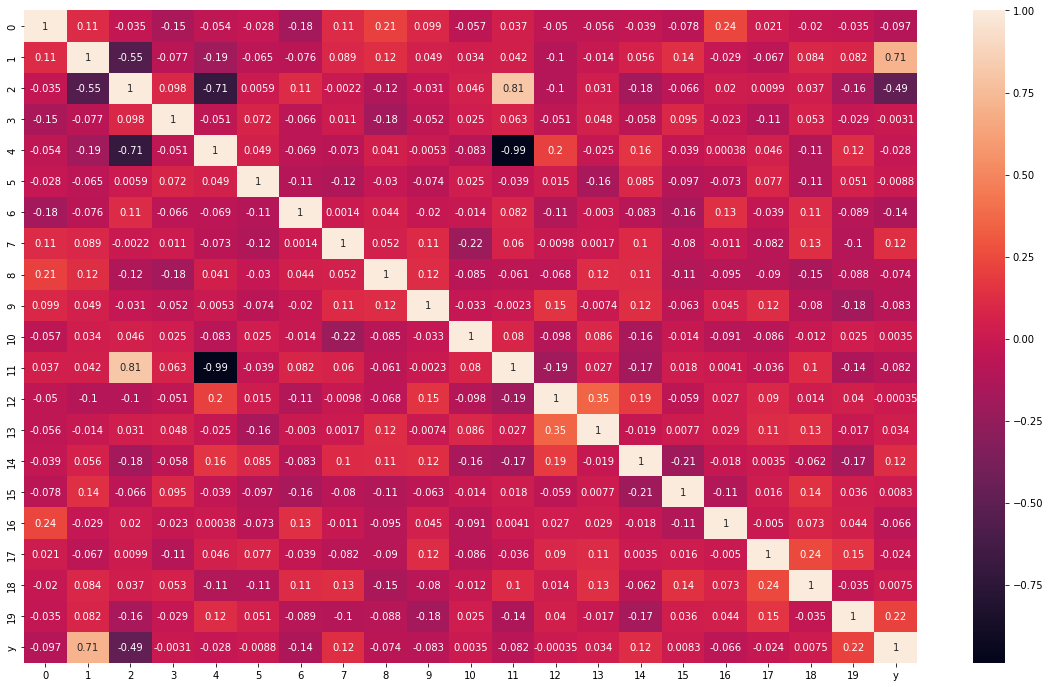

In [6]:
plt.subplots(figsize=(20,12))  
sns.heatmap(df.corr(), annot=True, fmt='.2g')

Используем VarianceThreshold и удалим маловариативные признаки. Поставим порог вариативности равным 0.5.

In [7]:
selector = VarianceThreshold(threshold=.5)
new_x = selector.fit_transform(df.iloc[:,:-1])

Как видим не один признак не был удален. Удалим из нашего датафрема только признаки с высокой корреляцией.

In [8]:
pd.DataFrame(new_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.266237,1.578341,0.247676,0.687824,-1.847434,0.953177,-0.345242,-0.665180,0.793525,-0.034685,0.838713,1.332393,0.457189,0.696194,0.149828,0.391683,0.080271,-0.170702,0.765867,-2.168618
1,0.095557,-1.275961,1.802963,-1.088162,-1.595212,1.288769,0.134925,-2.002079,-0.500791,-1.107439,0.303234,1.522093,-0.982756,-0.176286,-0.829875,-0.757856,-1.778601,2.086683,1.147100,-0.344624
2,-0.351827,0.274941,-0.745715,0.087547,0.894523,0.466792,-0.986960,0.474161,-0.733520,-0.437133,-3.326870,-0.791480,1.286021,0.017672,-0.722067,-0.504842,1.049926,1.647945,-0.294323,1.091709
3,-0.307988,-0.523734,1.299232,-1.014463,-1.516978,-0.065410,0.766116,0.287208,-0.952897,0.780754,1.189528,1.350327,-0.543883,-1.055840,0.021202,-1.115264,-0.061635,0.184302,-1.529391,-0.330676
4,1.335312,0.893236,0.039855,-0.935869,-0.890852,0.099499,-2.404226,-1.637614,-0.258049,1.390346,1.301120,0.623885,-0.486319,-1.651680,-1.001305,0.735410,-0.507074,-0.328568,1.088858,-0.364615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.151448,0.598700,-1.038558,1.024996,1.045436,0.715458,-1.892635,-1.769097,-0.157309,-0.284262,-1.029072,-0.964070,-0.087236,-0.412355,0.587930,-1.164260,0.252308,-0.698067,-0.582930,0.115066
96,0.196785,2.640935,0.884917,0.424801,-3.816647,0.255542,-0.758512,0.560022,-0.164129,0.197750,-0.188145,2.839895,-0.597657,0.336836,0.225961,0.913505,-0.553797,0.337937,0.035110,-0.730028
97,0.400297,2.026394,0.654037,-0.540146,-2.890031,-1.818252,2.036650,0.990153,-0.095969,0.863532,-1.108352,2.146667,-1.673636,-0.904882,-0.590091,-0.254511,-0.470807,0.499184,0.289253,-0.971332
98,-1.454460,-1.495250,0.101121,0.100597,1.232472,-1.616535,0.812154,-0.517912,0.203718,0.599848,0.291614,-0.826589,0.306336,1.656869,-0.887197,0.394161,-0.656299,0.607953,0.366593,-0.522742


Удаляем два столбца 2 и 11.

In [9]:
df_without_corr_params = df.copy()
df_without_corr_params.drop(2, inplace=True, axis=1)
df_without_corr_params.drop(11, inplace=True, axis=1)
df_without_corr_params.head()

,0,1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,y
0,-0.266237,1.578341,0.687824,-1.847434,0.953177,-0.345242,-0.665180,0.793525,-0.034685,0.838713,0.457189,0.696194,0.149828,0.391683,0.080271,-0.170702,0.765867,-2.168618,1
1,0.095557,-1.275961,-1.088162,-1.595212,1.288769,0.134925,-2.002079,-0.500791,-1.107439,0.303234,-0.982756,-0.176286,-0.829875,-0.757856,-1.778601,2.086683,1.147100,-0.344624,0
2,-0.351827,0.274941,0.087547,0.894523,0.466792,-0.986960,0.474161,-0.733520,-0.437133,-3.326870,1.286021,0.017672,-0.722067,-0.504842,1.049926,1.647945,-0.294323,1.091709,1
3,-0.307988,-0.523734,-1.014463,-1.516978,-0.065410,0.766116,0.287208,-0.952897,0.780754,1.189528,-0.543883,-1.055840,0.021202,-1.115264,-0.061635,0.184302,-1.529391,-0.330676,0
4,1.335312,0.893236,-0.935869,-0.890852,0.099499,-2.404226,-1.637614,-0.258049,1.390346,1.301120,-0.486319,-1.651680,-1.001305,0.735410,-0.507074,-0.328568,1.088858,-0.364615,1


Обучим модель на новых данных. Средняя точность не изменилась.

In [10]:
train(df_without_corr_params, "without corr params")

0.8800000000000001


#### Дисперсионный анализ

In [11]:
new_ds = SelectKBest(f_classif, k=5).fit_transform(df_without_corr_params.iloc[:,:-1], df_without_corr_params.iloc[:,-1])
df_5_best = pd.DataFrame(new_ds)
df_5_best['y'] = df_without_corr_params.iloc[:,-1]
df_5_best

,0,1,2,3,4,y
0,1.578341,-0.345242,-0.665180,0.149828,-2.168618,1
1,-1.275961,0.134925,-2.002079,-0.829875,-0.344624,0
2,0.274941,-0.986960,0.474161,-0.722067,1.091709,1
3,-0.523734,0.766116,0.287208,0.021202,-0.330676,0
4,0.893236,-2.404226,-1.637614,-1.001305,-0.364615,1
...,...,...,...,...,...,...
95,0.598700,-1.892635,-1.769097,0.587930,0.115066,1
96,2.640935,-0.758512,0.560022,0.225961,-0.730028,1
97,2.026394,2.036650,0.990153,-0.590091,-0.971332,1
98,-1.495250,0.812154,-0.517912,-0.887197,-0.522742,0


In [12]:
train(df_5_best, "5 best params")

0.86


Проведя эксперимент по разным диапазоном мы видим, что метрика на 6 лучших признаках и на 14 лучших признаках дает самые высокие результаты. А раз 6 признака дают такие жде результаты что и 14 то избавимся от лишних признаков. 

(Для теоретических будующих предсказаниях на этих данных лучше было оставить большее количество признаков, так как они покрывают большую область возможных полезных данных или в люом случае лучше выбирать меньшее количество признаков раз метрика одинакова?)

In [13]:
for i in range(1, df_without_corr_params.shape[1]):
  temp_ds = SelectKBest(f_classif, k=i).fit_transform(df_without_corr_params.iloc[:,:-1], df_without_corr_params.iloc[:,-1])
  df_k_best = pd.DataFrame(temp_ds)
  df_k_best['y'] = df_without_corr_params.iloc[:,-1]
  print('#', i, sep='', end=' ')
  train(df_k_best, "{} best params".format(i))

#1 0.86
#2 0.8799999999999999
#3 0.8699999999999999
#4 0.8699999999999999
#5 0.86
#6 0.9
#7 0.8699999999999999
#8 0.89
#9 0.8800000000000001
#10 0.8800000000000001
#11 0.8800000000000001
#12 0.8800000000000001
#13 0.89
#14 0.9
#15 0.8700000000000001
#16 0.8600000000000001
#17 0.8800000000000001
#18 0.8800000000000001


In [14]:
temp_ds = SelectKBest(f_classif, k=6).fit_transform(df_without_corr_params.iloc[:,:-1], df_without_corr_params.iloc[:,-1])
df_6_best = pd.DataFrame(temp_ds)
df_6_best['y'] = df_without_corr_params.iloc[:,-1]
df_6_best

,0,1,2,3,4,5,y
0,-0.266237,1.578341,-0.345242,-0.665180,0.149828,-2.168618,1
1,0.095557,-1.275961,0.134925,-2.002079,-0.829875,-0.344624,0
2,-0.351827,0.274941,-0.986960,0.474161,-0.722067,1.091709,1
3,-0.307988,-0.523734,0.766116,0.287208,0.021202,-0.330676,0
4,1.335312,0.893236,-2.404226,-1.637614,-1.001305,-0.364615,1
...,...,...,...,...,...,...,...
95,-1.151448,0.598700,-1.892635,-1.769097,0.587930,0.115066,1
96,0.196785,2.640935,-0.758512,0.560022,0.225961,-0.730028,1
97,0.400297,2.026394,2.036650,0.990153,-0.590091,-0.971332,1
98,-1.454460,-1.495250,0.812154,-0.517912,-0.887197,-0.522742,0


#### Отбор с использованием моделей

Проведем отбор с помощью модели LogisticRegression с параметрами L1 регуляризацией для ранее отобранных признаков.

In [15]:
sel = SelectFromModel(estimator=LogisticRegression(random_state=2, penalty='l1', solver='liblinear')).fit(df_6_best.iloc[:,:-1], df_6_best.iloc[:,-1])

Видим что все признаки стоят в True, значит модель решила что ни один признак не лишний

In [16]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True])

Ради эксперемента попробуем провести те же действия для модели с 14 лучшими признаками.

In [17]:
temp_ds = SelectKBest(f_classif, k=14).fit_transform(df_without_corr_params.iloc[:,:-1], df_without_corr_params.iloc[:,-1])
df_14_best = pd.DataFrame(temp_ds)
df_14_best['y'] = df_without_corr_params.iloc[:,-1]

Здесь модель отобрала 11 признаков из 14.

In [18]:
sel = SelectFromModel(estimator=LogisticRegression(random_state=2, penalty='l1', solver='liblinear')).fit(df_14_best.iloc[:,:-1], df_14_best.iloc[:,-1])
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True])

Сделаем датафрейм

In [19]:
cols_idxs = sel.get_support(indices=True)
df_after_log_reg_for_14_best_params = df_14_best.iloc[:,cols_idxs]
df_after_log_reg_for_14_best_params['y'] = df_14_best.iloc[:,-1]
df_after_log_reg_for_14_best_params

<ipython-input-19-30012bfdf71a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_log_reg_for_14_best_params['y'] = df_14_best.iloc[:,-1]


,0,1,2,3,4,5,6,7,9,10,13,y
0,-0.266237,1.578341,-1.847434,0.953177,-0.345242,-0.665180,0.793525,-0.034685,0.149828,0.391683,-2.168618,1
1,0.095557,-1.275961,-1.595212,1.288769,0.134925,-2.002079,-0.500791,-1.107439,-0.829875,-0.757856,-0.344624,0
2,-0.351827,0.274941,0.894523,0.466792,-0.986960,0.474161,-0.733520,-0.437133,-0.722067,-0.504842,1.091709,1
3,-0.307988,-0.523734,-1.516978,-0.065410,0.766116,0.287208,-0.952897,0.780754,0.021202,-1.115264,-0.330676,0
4,1.335312,0.893236,-0.890852,0.099499,-2.404226,-1.637614,-0.258049,1.390346,-1.001305,0.735410,-0.364615,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.151448,0.598700,1.045436,0.715458,-1.892635,-1.769097,-0.157309,-0.284262,0.587930,-1.164260,0.115066,1
96,0.196785,2.640935,-3.816647,0.255542,-0.758512,0.560022,-0.164129,0.197750,0.225961,0.913505,-0.730028,1
97,0.400297,2.026394,-2.890031,-1.818252,2.036650,0.990153,-0.095969,0.863532,-0.590091,-0.254511,-0.971332,1
98,-1.454460,-1.495250,1.232472,-1.616535,0.812154,-0.517912,0.203718,0.599848,-0.887197,0.394161,-0.522742,0


Попробуем обучить дерево на трех датасетах 1 - на датафрейме 6 лучших параметров, 14 лучших параметров и на датафрейме после применения Логистической регресии.

In [20]:
forest_6_best_params = RandomForestClassifier(random_state=2).fit(df_6_best.iloc[:,:-1], df_6_best.iloc[:,-1])
forest_14_best_params = RandomForestClassifier(random_state=2).fit(df_14_best.iloc[:,:-1], df_14_best.iloc[:,-1])
forest_after_log_reg_for_14_best_params = RandomForestClassifier(random_state=2).fit(df_after_log_reg_for_14_best_params.iloc[:,:-1], df_after_log_reg_for_14_best_params.iloc[:,-1])

In [21]:
forest_6_best_params.feature_importances_

array([0.07917133, 0.56885691, 0.08562768, 0.08730526, 0.08064045,
       0.09839837])

In [22]:
forest_14_best_params.feature_importances_

array([0.0413137 , 0.42547689, 0.10246995, 0.03439398, 0.04320304,
       0.03410696, 0.05538037, 0.0354961 , 0.03653063, 0.03464362,
       0.0349823 , 0.02721359, 0.03803292, 0.05675594])

In [23]:
forest_after_log_reg_for_14_best_params.feature_importances_

array([0.05604778, 0.43700237, 0.11772093, 0.03277213, 0.04747829,
       0.04751749, 0.06177593, 0.03978672, 0.05652162, 0.03246168,
       0.07091507])

В среднем все признаки показывают важность около 0.1, в то время как первый признак имеет важность более 0.5.

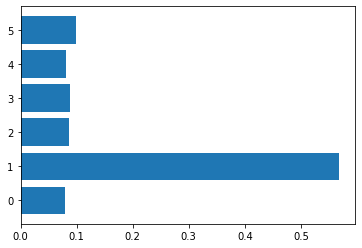

In [24]:
plt.barh(np.arange(len(forest_6_best_params.feature_importances_)), forest_6_best_params.feature_importances_)
plt.yticks(np.arange(len(list(df_6_best.columns)[:-1])), list(df_6_best.columns)[:-1])
plt.show()

На след двух графиках видно, что после применения логистической регресии на датафрейме с 14 лучшими параметрами мы удалили маловажные параметры. 

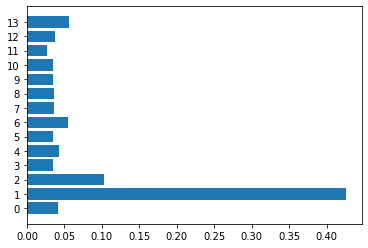

In [25]:
plt.barh(np.arange(len(forest_14_best_params.feature_importances_)), forest_14_best_params.feature_importances_)
plt.yticks(np.arange(len(list(df_14_best.columns)[:-1])), list(df_14_best.columns)[:-1])
plt.show()

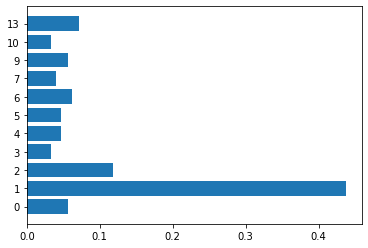

In [26]:
plt.barh(np.arange(len(forest_after_log_reg_for_14_best_params.feature_importances_)), forest_after_log_reg_for_14_best_params.feature_importances_)
plt.yticks(np.arange(len(list(df_after_log_reg_for_14_best_params.columns)[:-1])), list(df_after_log_reg_for_14_best_params.columns)[:-1])
plt.show()

In [27]:
df_forest = df_after_log_reg_for_14_best_params.copy()
df_forest.drop(10, inplace=True, axis=1)
df_forest.drop(9, inplace=True, axis=1)
df_forest.drop(7, inplace=True, axis=1)
df_forest.drop(6, inplace=True, axis=1)
df_forest.drop(5, inplace=True, axis=1)
df_forest.drop(4, inplace=True, axis=1)
df_forest.drop(3, inplace=True, axis=1)
df_forest.head()

,0,1,2,13,y
0,-0.266237,1.578341,-1.847434,-2.168618,1
1,0.095557,-1.275961,-1.595212,-0.344624,0
2,-0.351827,0.274941,0.894523,1.091709,1
3,-0.307988,-0.523734,-1.516978,-0.330676,0
4,1.335312,0.893236,-0.890852,-0.364615,1


Посмотрим на метреки в двух случаях. Так как два последних способа никак не поменяли прошлый датафрейм с 6 лучшими параметрами то не будем смотреть его метрику.

In [28]:
train(df_after_log_reg_for_14_best_params, "LogisticRegression for 14 best params")

0.9099999999999999


In [29]:
train(df_forest, "RandomForestClassifier for LogisticRegression")

0.8800000000000001


#### Перебор признаков

Попробуем для перебора признаков использовать модель KNeighborsClassifier с разным значением гиперпараметра. Мы видим, что при 6 ближ соседей мы получаем максимальную точность.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

for i in range(1, 20):
  sfs = SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=i), n_features_to_select='auto')
  _ = sfs.fit(df_after_log_reg_for_14_best_params.iloc[:,:-1], df_after_log_reg_for_14_best_params.iloc[:,-1])

  df_knn = df_after_log_reg_for_14_best_params.iloc[:,sfs.get_support(indices=True)]
  df_knn['y'] = df_after_log_reg_for_14_best_params.iloc[:,-1]

  print('#', i, sep='', end=' ')
  train(df_knn, "{} knn".format(i))

#1 0.9099999999999999
#2 0.8800000000000001
#3 0.9099999999999999
#4 0.9099999999999999
#5 0.8800000000000001
#6 0.9199999999999999
#7 0.8899999999999999
#8 0.9099999999999999
#9 0.85
#10 0.9
#11 0.8800000000000001
#12 0.9099999999999999
#13 0.89
#14 0.8800000000000001
#15 0.9
#16 0.9099999999999999
#17 0.9099999999999999
#18 0.8800000000000001
#19 0.8699999999999999


Попробум отобрать признаки с помощью RandomForestClassifier. Получается, что нужно было отобрать еще дополнительно один столбец чтобы значение повысилось. На прошлом шаге вручную я не отобрал столбец 9 и получил худшю метрику. Через селектор я смог повысить метрику. 

In [31]:
sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=2))
_ = sfs.fit(df_after_log_reg_for_14_best_params.iloc[:,:-1], df_after_log_reg_for_14_best_params.iloc[:,-1])

df_forest_2 = df_after_log_reg_for_14_best_params.iloc[:,sfs.get_support(indices=True)]
df_forest_2['y'] = df_after_log_reg_for_14_best_params.iloc[:,-1]

train(df_forest_2, "Selector with RandomForestClassifier")

0.9099999999999999


In [32]:
df_forest_2

,0,1,2,9,13,y
0,-0.266237,1.578341,-1.847434,0.149828,-2.168618,1
1,0.095557,-1.275961,-1.595212,-0.829875,-0.344624,0
2,-0.351827,0.274941,0.894523,-0.722067,1.091709,1
3,-0.307988,-0.523734,-1.516978,0.021202,-0.330676,0
4,1.335312,0.893236,-0.890852,-1.001305,-0.364615,1
...,...,...,...,...,...,...
95,-1.151448,0.598700,1.045436,0.587930,0.115066,1
96,0.196785,2.640935,-3.816647,0.225961,-0.730028,1
97,0.400297,2.026394,-2.890031,-0.590091,-0.971332,1
98,-1.454460,-1.495250,1.232472,-0.887197,-0.522742,0


In [33]:
stat = pd.DataFrame(statistic[1:], columns = statistic[0])
stat

,name,number of feature,mean accure
0,default data,"(100, 21)",0.88
1,without corr params,"(100, 19)",0.88
2,5 best params,"(100, 6)",0.86
3,1 best params,"(100, 2)",0.86
4,2 best params,"(100, 3)",0.88
5,3 best params,"(100, 4)",0.87
6,4 best params,"(100, 5)",0.87
7,5 best params,"(100, 6)",0.86
8,6 best params,"(100, 7)",0.90
9,7 best params,"(100, 8)",0.87


### Выводы

В ходе проделанной работы разобрался с разными методами отбора признаков на основе статически методов, дисперсионного анализа, отбора с использованием моделей и перебора признаков.

Понял, что признаки, которые выглядят неважными могут приносить ценность модели и повышать ее метрику. 

В итоге получили лучшую метрику равной 0.92 с 6 ближ соседями при переборе признаков. 